In [1]:
import os, sys, time
import tifffile as tif
sys.path.append("/home/emilyjanedennis/Desktop/GitHub/rat_BrainPipe")
from tools.utils.io import makedir
from tools.registration.register import change_interpolation_order, transformix_command_line_call
from tools.registration.transform_list_of_points import modify_transform_files
from scipy.ndimage.interpolation import zoom
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv

# If you need to determine the percent voxel change between two images follow these steps first. 

## If you already have a "percent.csv" file, skip to next section

In [5]:
src = "/home/emilyjanedennis/Desktop/for_registration_to_lightsheet"
affinefile = os.path.join(src, "output_dirs/Chon_to_PRA_affine/result.tif")
transformixedfile = os.path.join(src, "output_dirs/Chon_to_PRA/result.3.tif")
annotationsfilename = os.path.join(src,"labels/chon_label_ids.csv")
voxcsv = os.path.join(src,"Chon_to_PRA_vox.csv")
percentcsv = os.path.join(src,"Chon_to_PRA_percent.csv")
transformixed_relative_ZEROED_tiff
transformixed_relative_tiff = ""

In [6]:
affine = tif.imread(affinefile)
print("read affine tiff")
transformixed = tif.imread(transformixedfile)
print("read transformixed tiff")

read affine tiff
read transformixed tiff
read annotations


In [34]:
# make sure your annotations have the first column as id number, 2nd as abbreviation, or else change the input below
anns=pd.read_csv(annotationsfilename,usecols=[0,1],header=0,names=['id','abbr'])
print("read annotations")

read annotations


In [41]:
df=anns.dropna()
df

,id,abbr
0,8.0,grey
1,567.0,CH
2,688.0,CTX
3,695.0,CTXpl
4,315.0,Isocortex
...,...,...
1632,11.0,plf
1635,34.0,icf
1636,43.0,apmf
1639,65.0,pfs


In [42]:
df.insert(2,'affine_vox',0)
df.insert(3,'transformixed_vox',0)

In [43]:
for i in range(0,np.size(df['id'])-1):
    df.transformixed_vox[i] = np.size(transformixed[transformixed==df.id[i]])
    df.affine_vox[i] = np.size(affine[affine==df.id[i]])

<ipython-input-43-4814138a1770>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.transformixed_vox[i] = np.size(transformixed[transformixed==df.id[i]])
/home/emilyjanedennis/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3343: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
<ipython-input-43-4814138a1770>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.affin

KeyError: 142

In [45]:
df

,id,abbr,affine_vox,transformixed_vox
0,8.0,grey,13873,349627
1,567.0,CH,20194,0
2,688.0,CTX,18522,0
3,695.0,CTXpl,21114,0
4,315.0,Isocortex,15392,3424
...,...,...,...,...
1632,11.0,plf,0,0
1635,34.0,icf,0,0
1636,43.0,apmf,0,0
1639,65.0,pfs,0,0


In [46]:
df['change'] = df['affine_vox']-df['transformixed_vox']

<ipython-input-46-2b5f6338f5d8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['change'] = df['affine_vox']-df['transformixed_vox']


In [47]:
df

,id,abbr,affine_vox,transformixed_vox,change
0,8.0,grey,13873,349627,-335754
1,567.0,CH,20194,0,20194
2,688.0,CTX,18522,0,18522
3,695.0,CTXpl,21114,0,21114
4,315.0,Isocortex,15392,3424,11968
...,...,...,...,...,...
1632,11.0,plf,0,0,0
1635,34.0,icf,0,0,0
1636,43.0,apmf,0,0,0
1639,65.0,pfs,0,0,0


In [51]:
df = df[df.transformixed_vox > 0]
df

,id,abbr,affine_vox,transformixed_vox,change,percent
0,8.0,grey,13873,349627,-335754,-96.032057
4,315.0,Isocortex,15392,3424,11968,349.532710
5,184.0,FrA,16838,491626,-474788,-96.575039
6,68.0,FrA-1,48462,270766,-222304,-82.101889
9,500.0,M,30827,316,30511,9655.379747
11,320.0,M1-1,136810,2525,134285,5318.217822
28,453.0,S,24830,338,24492,7246.153846
29,322.0,S1,19968,2346,17622,751.150895
31,346.0,S1-2/3,36512,670,35842,5349.552239
43,329.0,S1BF,17909,1846,16063,870.151679


In [55]:
dfpercent = df['change']/df['transformixed_vox']
dfpercent[np.isinf(dfpercent)]=0
df['percent'] = dfpercent
dfpercent.replace(0,np.nan)

0        -0.960321
4         3.495327
5        -0.965750
6        -0.821019
9        96.553797
11       53.182178
28       72.461538
29        7.511509
31       53.495522
43        8.701517
45       -0.154306
50       11.912384
52       -0.723729
55      391.000000
56      101.838150
57       20.184250
63       -0.992445
85       40.201327
86      189.034188
92       32.953437
97       -0.906912
98      117.712121
99       38.933962
106      -0.948479
114      -0.814930
115      -0.861853
116      -0.950987
117      -0.876926
127      -0.820686
129    1033.880952
132      -0.216647
133      -0.933037
134      -0.620757
137      -0.265089
dtype: float64

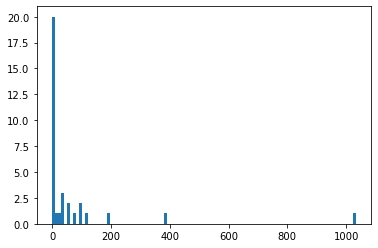

In [56]:
plt.hist(df.percent,bins=100)
plt.show()

In [57]:
mp = np.nanmedian(df.percent)
sp = np.nanstd(df.percent)

In [58]:
highmp = mp+sp
highmp

186.1160455086315

In [59]:
lowmp = mp-sp
lowmp

-182.77502405025973

In [60]:
df.to_csv(percentcsv)

In [61]:
df=pd.read_csv(percentcsv)

In [62]:
df

,Unnamed: 0,id,abbr,affine_vox,transformixed_vox,change,percent
0,0,8.0,grey,13873,349627,-335754,-0.960321
1,4,315.0,Isocortex,15392,3424,11968,3.495327
2,5,184.0,FrA,16838,491626,-474788,-0.965750
3,6,68.0,FrA-1,48462,270766,-222304,-0.821019
4,9,500.0,M,30827,316,30511,96.553797
5,11,320.0,M1-1,136810,2525,134285,53.182178
6,28,453.0,S,24830,338,24492,72.461538
7,29,322.0,S1,19968,2346,17622,7.511509
8,31,346.0,S1-2/3,36512,670,35842,53.495522
9,43,329.0,S1BF,17909,1846,16063,8.701517


In [63]:
too = df.id

In [64]:
transformixed_relative = transformixed

In [65]:
# add list of unique values not in twoxh/twoxl but in transformixed
x = np.unique(transformixed)
np.size(x)

554

In [66]:
test = np.setdiff1d(x,too)
np.size(test)

520

In [ ]:
for i in test:
    transformixed_relative[transformixed_relative==i]=0

In [ ]:
tif.imsave(transformixed_relative_ZEROED_tiff,transformixed_relative)

In [53]:
for i in too:
    transformixed_relative[transformixed_relative==i]=df.loc[df['id']==i,'percent'].iloc[0]

In [54]:
tif.imsave(transformixed_relative_tiff,transformixed_relative)

# If you already have a percent file

In [2]:
df=pd.read_csv("/home/emilyjanedennis/Desktop/for_registration_to_lightsheet//percent.csv")

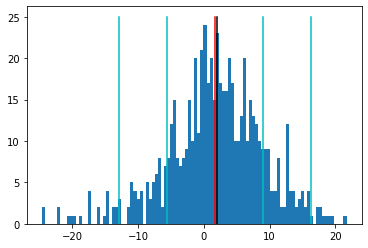

In [31]:
plt.hist(df.percent[df.affine_vox>5],bins=100)

dfmean = np.nanmean(df.percent[df.affine_vox>5])
dfmedian = np.nanmedian(df.percent[df.affine_vox>5])
dfstd = np.std(df.percent[df.affine_vox>5])
mp = dfmean + dfstd
mm = dfmean - dfstd

mp2 = dfmean + 2*dfstd
mp3 = dfmean + 3*dfstd
mm2 = dfmean - 2*dfstd
mm3 = dfmean - 3*dfstd


plt.plot([dfmean, dfmean],[0,25],'r')
plt.plot([dfmedian, dfmedian],[0,25],'k')
plt.plot([mp,mp],[0,25],'c')
plt.plot([mm,mm],[0,25],'c')
plt.plot([mp2,mp2],[0,25],'c')
plt.plot([mm2,mm2],[0,25],'c')
plt.show()

In [11]:
# want to make summary -- ideally show a ranked 3, 2, 1std>mean 
# in diff colors, and then the 
# values either written or in bar form on the right

df

,Unnamed: 0,id,abbr,affine_vox,mouserat_vox,change,percent
0,0,1.0,TMv,36116,36362,-246,-0.676530
1,1,2.0,SSp-m6b,17503,17403,100,0.574614
2,2,4.0,IC,26686,25748,938,3.643001
3,3,6.0,int,276697,242990,33707,13.871764
4,4,7.0,PSV,141030,171022,-29992,-17.536925
...,...,...,...,...,...,...,...
609,611,10703.0,DG-mo,639534,617537,21997,3.562054
610,612,10704.0,DG-po,79852,75946,3906,5.143128
611,613,12345.0,PDTg,9022,8236,786,9.543468
612,614,12346.0,Pa5,14189,18243,-4054,-22.222222


In [33]:
df2p = df[df.percent>mp2]
df2p = df2p.sort_values('percent',ascending=False)
df2m = df[df.percent < mm2]
df2m = df2m.sort_values('percent',ascending=False)

In [34]:
df2m

,Unnamed: 0,id,abbr,affine_vox,mouserat_vox,change,percent
441,443,852.0,PARN,396300,455051,-58751,-12.910861
464,466,903.0,ECU,49955,57490,-7535,-13.106627
103,103,198.0,pyd,20009,23032,-3023,-13.125217
544,546,1033.0,COPY,409406,474317,-64911,-13.685151
496,498,955.0,LRNm,98941,114657,-15716,-13.706969
225,227,445.0,SPVO,149057,174340,-25283,-14.502122
44,44,91.0,IP,131035,153562,-22527,-14.669645
601,603,1123.0,icp,75337,88414,-13077,-14.790644
79,79,153.0,V4r,41206,48386,-7180,-14.839003
56,56,114.0,SOCl,59534,70111,-10577,-15.086078


In [35]:
df2p

,Unnamed: 0,id,abbr,affine_vox,mouserat_vox,change,percent
501,503,962.0,MOs2/3,755537,620700,134837,21.723377
24,24,52.0,ENTl3,195678,163376,32302,19.771570
487,489,943.0,MOp2/3,697270,584826,112444,19.226915
71,71,139.0,ENTl5,222484,187518,34966,18.646743
390,392,767.0,MOs5,832331,704037,128294,18.222622
68,68,131.0,LA,177229,150647,26582,17.645224
11,11,20.0,ENTl2,255518,217263,38255,17.607692
490,492,946.0,PH,133688,113752,19936,17.525846
424,426,830.0,DMH,76786,65454,11332,17.312922


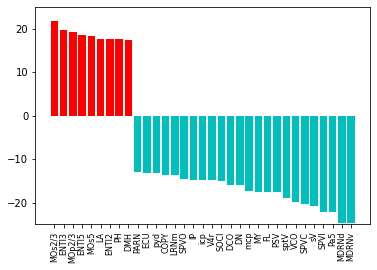

In [54]:
plt.bar(df2p.abbr,df2p.percent,color='r')
plt.bar(df2m.abbr,df2m.percent,color='c')
plt.xticks(rotation=90,fontsize=8)
plt.ylim([-25,25])
plt.show()